In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [3]:
SPOTIFY_API_URL = "https://api.spotify.com/v1/"
SPOTIFY_SEARCH_URL = SPOTIFY_API_URL + "search"

In [4]:
def authenticate_spotify_client(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    auth_response = requests.post(auth_url, {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
      })
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    return access_token

In [6]:
def search_artist(artist_name, access_token):
    headers = {
        'Authorization': 'Bearer {token}'.format(token=access_token)
    }
    params = {
        'q': artist_name,
        'type': 'artist'
    }
    response = requests.get(SPOTIFY_SEARCH_URL, headers=headers, params=params)
    data = response.json()
    return data['artists']['items'][0]['id']

In [12]:
def get_top_tracks(artist_id, access_token):
    top_tracks_url = SPOTIFY_API_URL + f"artists/{artist_id}/top-tracks"
    headers = {
        'Authorization': 'Bearer {token}'.format(token=access_token)
    }
    params = {
        'market': 'US'
    }
    response = requests.get(top_tracks_url, headers=headers, params=params)
    data = response.json()
    return data['tracks']

In [13]:
CLIENT_ID = '253c1072397848feab42291a86e760ab'
CLIENT_SECRET = '06a6e93ddbc04588a596edeb071acf83'

In [14]:
access_token = authenticate_spotify_client(CLIENT_ID, CLIENT_SECRET)

In [15]:
artist_id = search_artist("Taylor Swift", access_token)

In [17]:
# Get Taylor Swift's top tracks
try:
    top_tracks = get_top_tracks(artist_id, access_token)
    if not top_tracks:
        raise ValueError("No top tracks found for Taylor Swift.")
except Exception as e:
    print("Error:", e)
    top_tracks = []



track_names = [track['name'] for track in top_tracks]
track_popularity = [track['popularity'] for track in top_tracks]


C:\Users\riona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


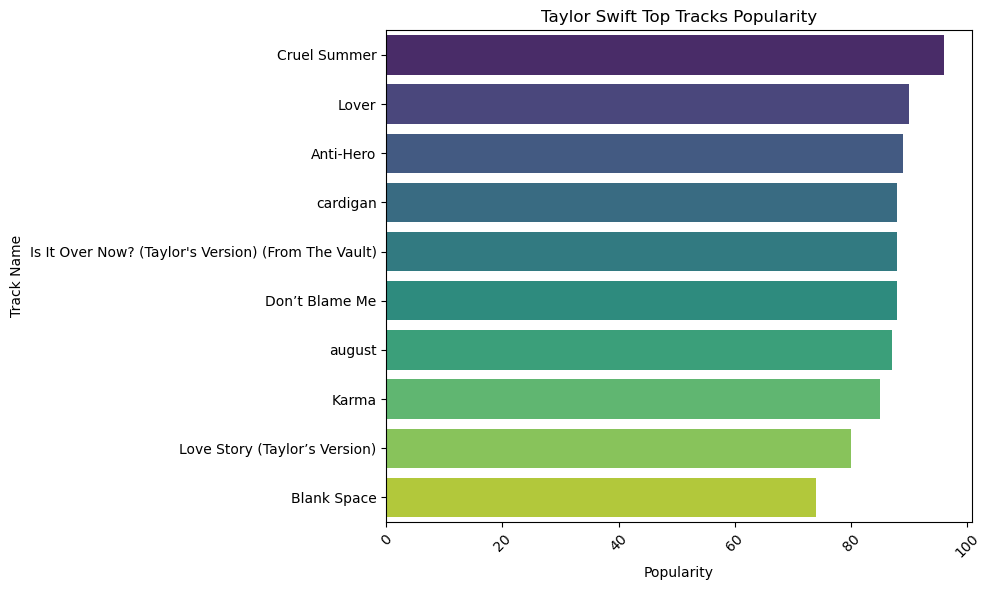

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=track_popularity, y=track_names, palette='viridis')
plt.title('Taylor Swift Top Tracks Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()